## 10-7. 미니 프로젝트 : 가위바위보 분류기를 만들자

- 배운 내용을 바탕으로 가위바위보 분류기를 만들기. 가장 먼저 직접 사진을 찍어 데이터를 준비. 

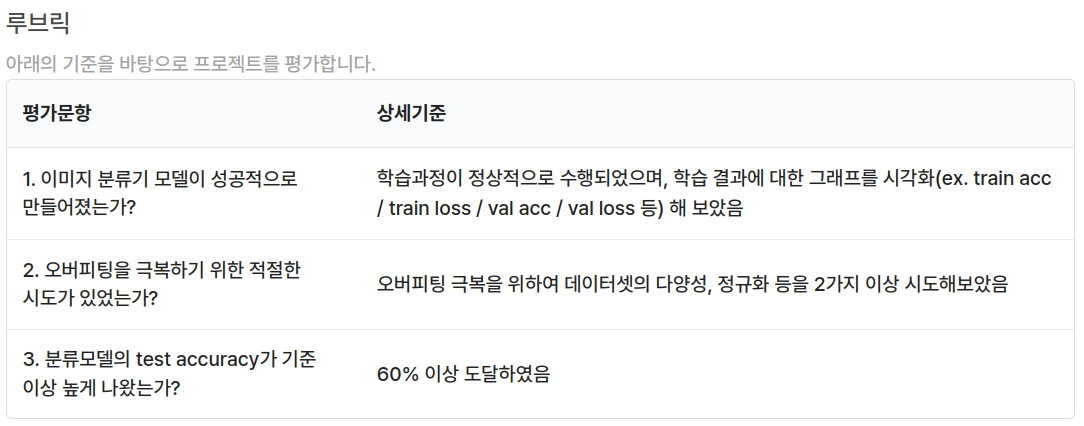

In [1]:
import tensorflow as tf # 버전 확인
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.21.4


### 1. 데이터 불러오기 + Resize 하기 + 데이터 준비

- 숫자 손글씨의 경우 이미지 크기가 28x28 여서 가위, 바위, 보 도 28x28로 PIL 라이브러리를 사용해서 만듦. 

In [2]:
from PIL import Image # 먼저 라이브러리를 불러오고
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


- 숫자 손글씨 인식기는 mnist.load_data() 라는 함수로 데이터를 읽었던 것 기억?  가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수를 만듦. 이 코드를 활용하면 임의의 사진 데이터(ex. 귤이 잘 익었나, 안 익었나? 웃는 얼굴인가, 우는 얼굴인가, 평범한 표정의 얼굴인가? 등)에 적용할 수 있다.


- load_data() 함수는 입력으로 이미지가 있는 폴더 위치를 받습니다. 여기서는 rock_scissor_paper 폴더 위치를 적어주면 됩니다. 숫자 손글씨는 0~9 까지의 클래스가 있었던 것 기억하시죠? 가위바위보의 경우 3개의 클래스 즉, 가위: 0, 바위: 1, 보: 2 로 라벨링.

In [3]:
import numpy as np

def load_data(img_path, number_of_data=1991):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=224
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape)) # Q 정답, y_train 이 2400개 맞?

학습데이터(x_train)의 이미지 개수는 1991 입니다.
x_train shape: (1991, 224, 224, 3)
y_train shape: (1991,)


라벨:  2


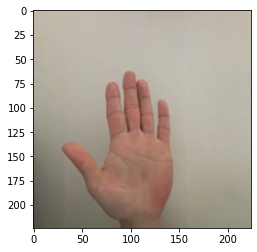

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os

plt.imshow(x_train[1900])
print('라벨: ', y_train[1900]) # Q train[20]을 하든 train[0]등 뭘 하든 아래 실행이 라벨이 0이 나오는건 왜?

### 2. 딥러닝 네트워크 설계

- 데이터의 준비는 됐고 가위바위보를 인식하는 딥러닝 네트워크를 설계

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224,224,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

### 3. 딥러닝 네트워크 학습시키기




In [8]:
print(x_train.shape) # 채널수 3까지 나와있어 reshape은 PASS 

(1991, 224, 224, 3)


-  x_train 학습 데이터로 딥러닝 네트워크를 학습시켜봄.  epochs=10 은 전체 60,000개의 데이터를 10번 반복사용해서 학습을 시켜라. 

In [9]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

#model.fit(x_train, y_train, epochs=20)  # optimizer, 손실함수등을 뭘로 바꿔줘야 accuracy가 올라갈까?

history = model.fit(x_train, y_train,
                    batch_size=50,    
                    epochs=20,
                    validation_split=0.2)

Epoch 1/20
32/32 [==============================] - 11s 63ms/step - loss: 469.9381 - accuracy: 0.4102 - val_loss: 1.2416 - val_accuracy: 0.4762
Epoch 2/20
32/32 [==============================] - 1s 36ms/step - loss: 0.4730 - accuracy: 0.8423 - val_loss: 0.7696 - val_accuracy: 0.7018
Epoch 3/20
32/32 [==============================] - 1s 36ms/step - loss: 0.1396 - accuracy: 0.9567 - val_loss: 0.7847 - val_accuracy: 0.7694
Epoch 4/20
32/32 [==============================] - 1s 37ms/step - loss: 0.0480 - accuracy: 0.9881 - val_loss: 0.8739 - val_accuracy: 0.8321
Epoch 5/20
32/32 [==============================] - 1s 37ms/step - loss: 0.0138 - accuracy: 0.9969 - val_loss: 0.9392 - val_accuracy: 0.8496
Epoch 6/20
32/32 [==============================] - 1s 37ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.9228 - val_accuracy: 0.8546
Epoch 7/20
32/32 [==============================] - 1s 37ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 1.0944 - val_accuracy: 0.8622
Epoch 8/20

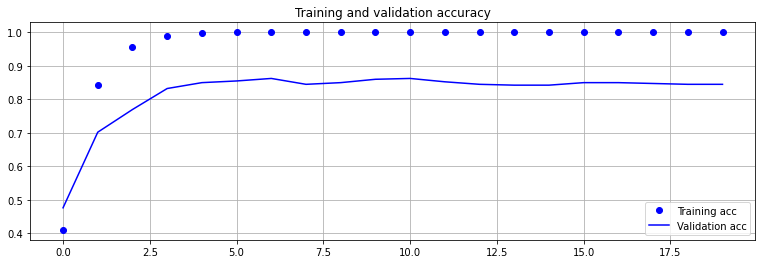

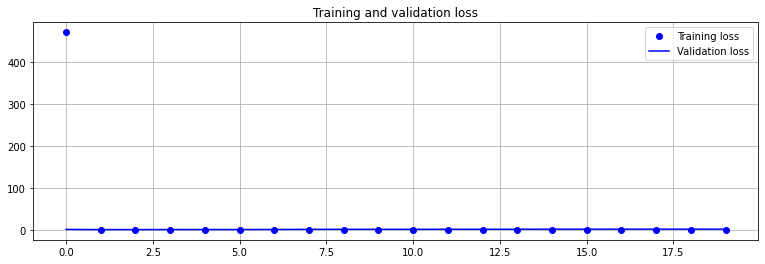

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(13,4))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.grid()

plt.figure(figsize=(13,4))

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid()

plt.show()

### 4. 얼마나 잘 만들었는지 확인 : 테스트 데이터로 성능을 확인

 - Train과 다른 사람의 '가위, 바위, 보 사진의 test data 구해서  test data의 accuracy를 측정해서 성능확인. 

In [11]:
def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=224
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_ttest)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path) # x_test define 안됐다는 에러 뜨면 이코드 덩어리 필요 ; image_dir_path로 load_data해서 (x_test, y_test)로 정함.
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape)) 

학습데이터(x_ttest)의 이미지 개수는 300 입니다.
x_test shape: (300, 224, 224, 3)
y_test shape: (300,)


In [12]:
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

x_test shape: (300, 224, 224, 3)
y_test shape: (300,)


In [13]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2) # verbose : 일반적으로 함수 인자로 verbose가 있으면 함수수행시 발생하는 상세한 정보들을 표준출력으로 자세히 내보낼 것인가를 나타냄. 보통 0 은 출력하지 않고, 1은 자세히, 2는 함축적인 정보만 출력하는 형태로
print(f"test_aloss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 14.8237 - accuracy: 0.3267
test_aloss: 14.823677062988281
test_accuracy: 0.3266666531562805


In [17]:

hp_1 = 64
hp_2 = 32
dense = 64

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(hp_1, (3,3), activation='relu', input_shape=(224,224,3))) # 컬러 이미지이므로 1 아니고 3
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(hp_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5)) # 드롭아웃 추가. 비율은 50%
model.add(keras.layers.Dense(dense, activation='relu'))
#model.add(keras.layers.Dropout(0.5)) # 드롭아웃 추가. 비율은 50%
model.add(keras.layers.Dense(32, kernel_regularizer='l1'))  # L1 정규화 적용
#model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(3, activation='softmax')) # 가위, 바위, 보 -> 3개 클래스로 분류

#model.summary()
epoch = 20
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train_norm, y_train, epochs= epoch)

test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose= 2)
print("test_loss :{} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Epoch 1/20
63/63 [==============================] - 3s 45ms/step - loss: 3.2939 - accuracy: 0.5063
Epoch 2/20
63/63 [==============================] - 3s 44ms/step - loss: 2.1261 - accuracy: 0.8327
Epoch 3/20
63/63 [==============================] - 3s 44ms/step - loss: 1.4114 - accuracy: 0.9478
Epoch 4/20
63/63 [==============================] - 3s 44ms/step - loss: 1.0165 - accuracy: 0.9679
Epoch 5/20
63/63 [==============================] - 3s 44ms/step - loss: 0.7291 - accuracy: 0.9824
Epoch 6/20
63/63 [==============================] - 3s 45ms/step - loss: 0.5340 - accuracy: 0.9900
Epoch 7/20
63/63 [==============================] - 3s 45ms/step - loss: 0.3940 - accuracy: 0.9950
Epoch 8/20
63/63 [==============================] - 3s 45ms/step - loss: 0.3097 - accuracy: 0.9930
Epoch 9/20
63/63 [==============================] - 3s 45ms/step - loss: 0.2550 - accuracy: 0.9930
Epoch 10/20
63/63 [==============================] - 3s 45ms/step - loss: 0.1938 - accuracy: 0.9960
Epoch 11/

### 시행착오들 

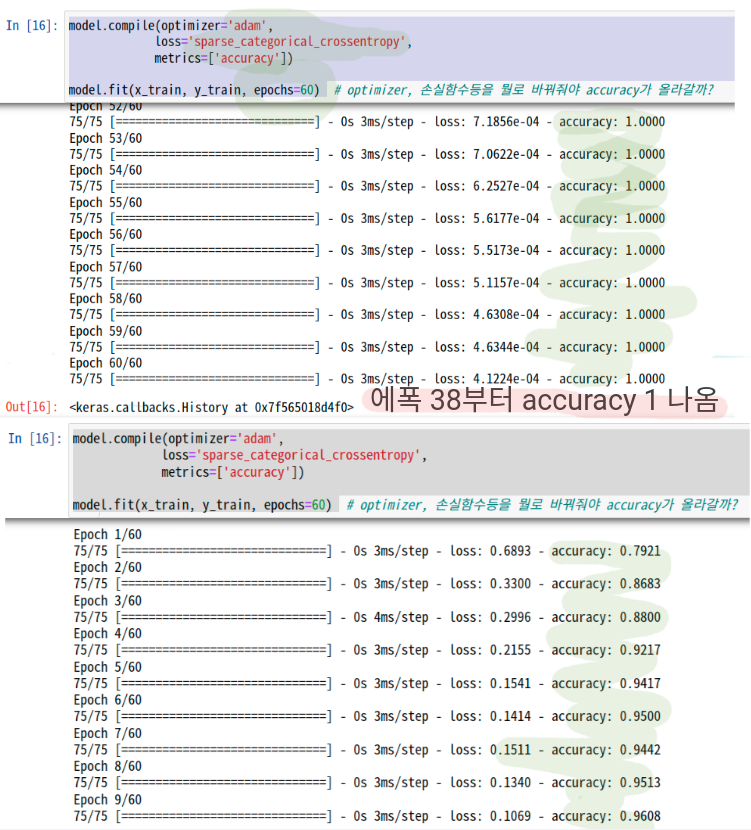

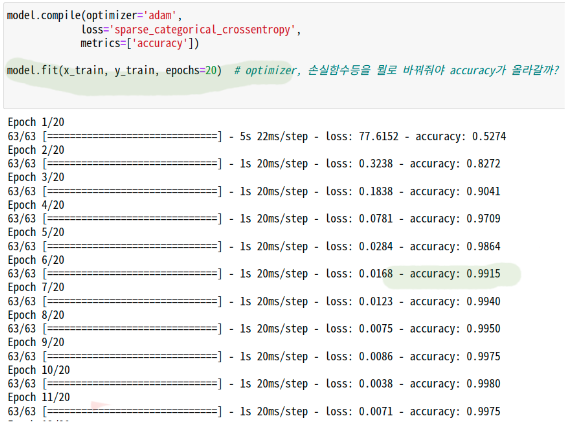

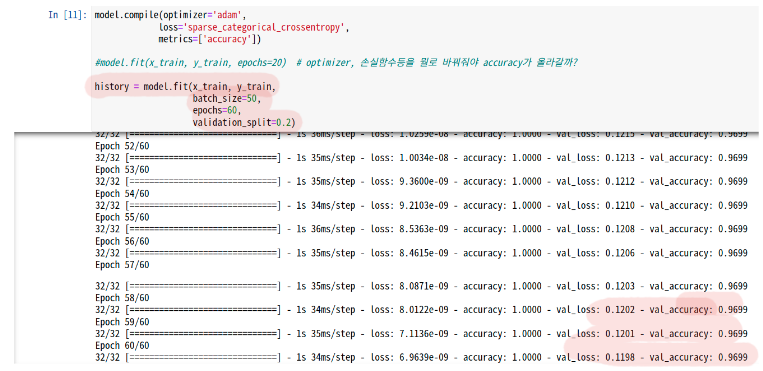

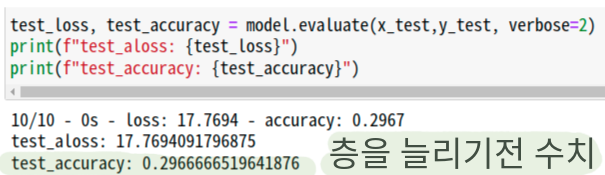

## Reference


- https://www.inflearn.com/questions/208344/verbose-%EC%9D%98%EB%AF%B8  verbose 


- http://taewan.kim/post/norm/  L1, L2 Norm

## 회고 


- 라이브러리 version 확인을 왜 하고 시작할까 ? -> 함수 쓰는게 다르다? 어쨓든 안해도 됨.


- Test data를 잘 써야할듯, Test accuracy가 너무 안나와 Test data 여러번 교체했다



#### < 시도해서 좋은 효과 얻은것>


- 이미지 28*28에서 224*224로 바꾼것


- dropout 1회, L1 정규화 한게 가장 수치가 높은 61% 간신히 나옴. 


- Kernel restart를 안하고도 dropout 1회, L1 정규화를 여러번 할때마다 test accuracy가 높게 나옴.



#### < 시도해도 효과가 좋지 않은것>

- layer를 7층에서 22개층 VGG16? 으로 바꿔도  수치 떨어짐. 


- layer 층을 VGG 16만큼 쌓고 층이 많으니 epoch시간이 훨씬 오래 걸리고 Valudation Accuracy가 0.97까지 올라갔으니 여러번 시도해보니 
  결과적으로 더 좋게. 챠트는 층이 적을때보다 업앤다운이 많음



#### < 해결할 의문점들>

- print('라벨: ', y_train[20]) # train[20]을 하든 train[0]등 뭘 하든 아래 실행이 라벨이 0이 나오는건 왜? ;타겟(라벨)이면 정답인데 정답이 밎으면 0, 틀리면 1 인거 ?


- Batch 50일때 val_accuracy가 0.96나오던게 Batch만 30으로 바꿨는데 에폭 19번일때 0.91이다  에폭 20번일때 0.69로 뚝 떨어지는건 왜?


- indent들여쓰기 정확히해도 ' jpg 파일을 읽어들이는 코드덩이''를 '28x28 사이즈로 바꾸어 저장 코드덩이'보다 먼저 쓰면 'indent Eorr'가 왜 나는지 모르겠음. 시간이 너무 소모되 할수없이 복붙으로 타협.

- Validation Accuracy의 Epoch 60돌릴땐 Epoch 17부터 같은 Accuracy 0.91로 계속 되길래  Epoch 20 돌렸더니 0.86으로 더 떨어지는건 왜 ?